# Developing Machine Learning Software

## Programming Language for Machine Learning

The most popular programming languages for machine learning (not necessarily in this order):

* [Python](http://www.python.org/): scripting language, it is easy to wrap C/C++ libraries, great libraries
* [Julia](http://julialang.org/): brand-new, awesome, efficient, designed for scientific programming
* [Octave](http://www.gnu.org/software/octave/): free Matlab clone
* C/C++: efficient, **general** purpose language
* Java: web applications, large scale and distributed systems
* ...

It helps **a lot** to use libraries that have support for linear algebra (matrices and vectors), e.g.

* Python: [NumPy](http://www.numpy.org/)
* Julia: builtin
* Octave: builtin
* C++: [Eigen **3**](http://eigen.tuxfamily.org/index.php?title=Main_Page)
* C/Fortran: [BLAS](http://en.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms) ([OpenBLAS](http://www.openblas.net/), CBLAS, ...), [LAPack](http://www.netlib.org/lapack/)
* Java: [JBlas](http://mikiobraun.github.io/jblas/) (BLAS wrapper), [Jama](http://math.nist.gov/javanumerics/jama/)

## Python

Python is possibly the best choice for the programming tasks today since there are many libraries that are great for machine learning, for example

* [NumPy](http://www.numpy.org/) for linear algebra
* [Matplotlib](http://matplotlib.org/) for visualization
* not required in this lecture: SciPy, Pandas, Scikit Learn, Theano, ...

In addition, you can work interactively with [IPython](http://ipython.org/) notebooks. Examples can be found at the [IPython Notebook Viewer](http://nbviewer.ipython.org/).

## Setup Python Environment

Required packages to run this notebook:

* Python
* IPython - interactive Python shell
* IPython notebooks - IPython for the browser
* NumPy - linear algebra library
* Matplotlib - plotting library

Scientific Python Distributions (available for every platform)

* **[Anaconda](https://store.continuum.io/cshop/anaconda/)**
* [Enthought Python Distribution](https://www.enthought.com/products/epd/)

## Introductions to Python and Scientific Programming

* **[Python Scientific Lecture Notes](http://scipy-lectures.github.io/)**
* [General Introduction to Python](http://www.diveintopython.net/)
* [Interactive Python Tutorial](http://www.learnpython.org/)
* [NumPy for Matlab Users](http://wiki.scipy.org/NumPy_for_Matlab_Users)

## IDEs

* Platform independend: [PyCharm](http://www.jetbrains.com/pycharm/), [Eclipse](http://www.eclipse.org/) with [PyDev](http://pydev.org/)
* Mac OS X: [TextMate](https://github.com/textmate/textmate)

# IPython

Document your code with

* **Markdown** and
* *LaTeX* formulas:

$$\sigma = \sqrt{\sum_{n=1}^N \left( x_n - \mu \right)^2}$$

In [1]:
# IPython magic: load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%timeit np.random.randn(10)

The slowest run took 32.00 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.35 µs per loop


In [3]:
%run test.py

ERROR: File `u'test.py'` not found.


In [4]:
cat README.md

Machine Learning Tutorials

These are IPython notebooks for the tutorials of the machine learning course
at the University of Bremen.

You can view the notebooks and the corresponding slides
[here](http://alexanderfabisch.github.io/ml_tutorials/).

Requirements
------------

The following packages are required to use these notebooks:

* Python
* IPython - interactive Python shell
* IPython notebooks - IPython for the browser
* NumPy - linear algebra library
* Matplotlib - plotting library

For Windows: use [Anaconda](https://store.continuum.io/cshop/anaconda/) or the [Enthought Python Distribution](https://www.enthought.com/products/epd/).



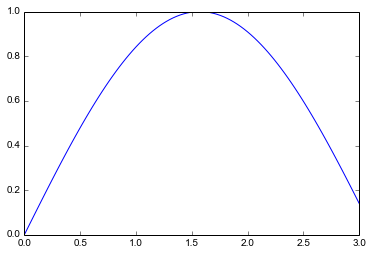

In [5]:
plot(linspace(0, 3, 100), sin(linspace(0, 3, 100)))

In [6]:
np.random.randn(2, 2)

array([[ 1.14795561, -0.07079994],
       [ 0.80683226,  0.38911358]])

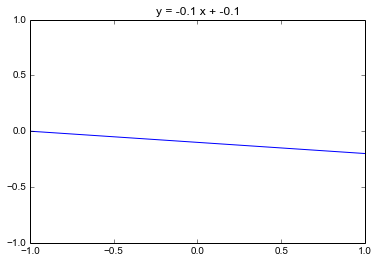

In [7]:
from IPython.html.widgets import interactive


def iwidget(w, b):
    x = np.linspace(-1, 1, 201)
    y = w * x + b
    plt.plot(x, y)
    plt.xlim((-1, 1))
    plt.ylim((-1, 1))
    plt.title("y = %g x + %g" % (w, b))


interactive(iwidget, w=(-1, 1, 0.1), b=(-0.5, 0.5, 0.1))

# NumPy

## Creating ndarrays

ndarrays can have n dimensions but most of them have 1 (vector) or 2 (matrix)

In [8]:
a = np.array([0, 1, 2])
a

array([0, 1, 2])

Vector of ones $\boldsymbol{1}$

In [9]:
b = np.ones(3)
b

array([ 1.,  1.,  1.])

Vector of zeros $\boldsymbol{0}$

In [10]:
c = np.zeros(3)
c

array([ 0.,  0.,  0.])

Identity matrix $\boldsymbol{I}$

In [11]:
D = np.eye(2)
D

array([[ 1.,  0.],
       [ 0.,  1.]])

iid. Gaussian samples

array([[ 1.86861784, -1.32459628],
       [ 0.87039489,  1.54050368],
       [-0.11447437, -1.615298  ],
       ..., 
       [ 1.22195061,  1.30860329],
       [-0.51144142, -1.6541586 ],
       [-1.75747407,  1.89154216]])

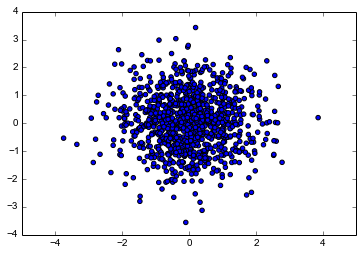

In [12]:
E = np.random.randn(1000, 2)
scatter(E[:, 0], E[:, 1])
E

Matrix multiplication

In [13]:
E.dot(D)

array([[ 1.86861784, -1.32459628],
       [ 0.87039489,  1.54050368],
       [-0.11447437, -1.615298  ],
       ..., 
       [ 1.22195061,  1.30860329],
       [-0.51144142, -1.6541586 ],
       [-1.75747407,  1.89154216]])

**Note:** `*` is **not** the matrix multiplication! It is the component-wise multiplication!

In [14]:
A = np.array([[0, 1], [2, 3]])
B = np.array([[4, 5], [6, 7]])
print("A * B")
print(A * B)
print("A.dot(B)")
print(A.dot(B))

A * B
[[ 0  5]
 [12 21]]
A.dot(B)
[[ 6  7]
 [26 31]]


## Linear algebra stuff

$||A||_2$ (Frobenius norm)

In [15]:
np.linalg.norm(A)

3.7416573867739413

$B^{-1}$ (inverse)

In [16]:
np.linalg.inv(B)

array([[-3.5,  2.5],
       [ 3. , -2. ]])

|A| (determinant)

In [17]:
np.linalg.det(A)

-2.0

$A x = b$

In [18]:
b = np.array([0, 3])
x = np.linalg.solve(A, b)
x

array([ 1.5,  0. ])

In [19]:
A.dot(x)

array([ 0.,  3.])

# Matplotlib

* [Matplotlib](http://matplotlib.org)
* [Gallery](http://matplotlib.org/gallery.html)

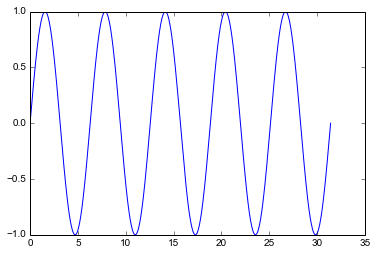

In [20]:
x = np.linspace(0, 10 * np.pi, 500)
y = np.sin(x)
plot(x, y)

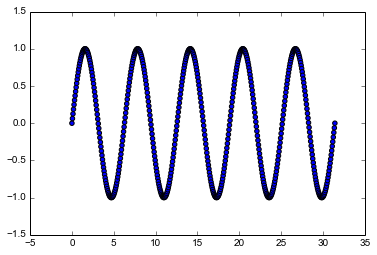

In [21]:
scatter(x, y)

<matplotlib.colorbar.Colorbar instance at 0x7f9202e8c128>

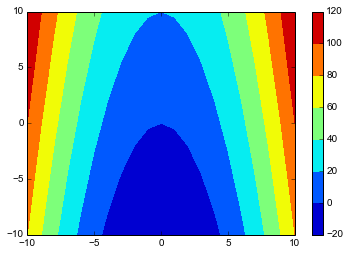

In [22]:
x, y = np.meshgrid(np.linspace(-10, 10, 21), np.linspace(-10, 10, 21))
z = x ** 2 + 2 * y
contourf(x, y, z)
colorbar()

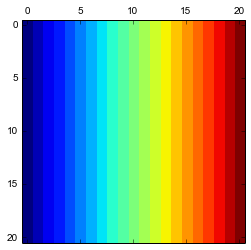

In [23]:
matshow(x)

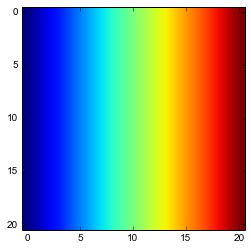

In [24]:
imshow(x)

# scikit learn

* [Documentation](http://scikit-learn.org)

Example: Digits dataset

In [25]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)

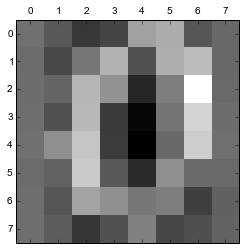

In [26]:
matshow(data[10].reshape(8, 8))
gray()

Let's reduce the 64-dimensional vectors to 2 dimensions (dimensionality reduction)

In [27]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(data)

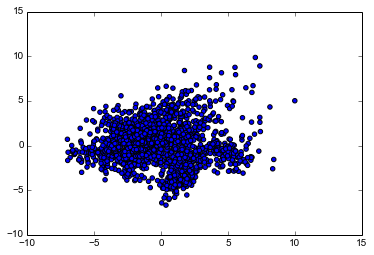

In [28]:
scatter(reduced_data[:, 0], reduced_data[:, 1])

Is there any structure? Can we automatically determine **clusters**?

In [29]:
from sklearn.cluster import KMeans

np.random.seed(42)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))

kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [30]:
from matplotlib import offsetbox

def plot_embedding(ax, digits, X):
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(digits.target[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[100., 100.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 1.0:
                continue  # don't show points that are too close
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)

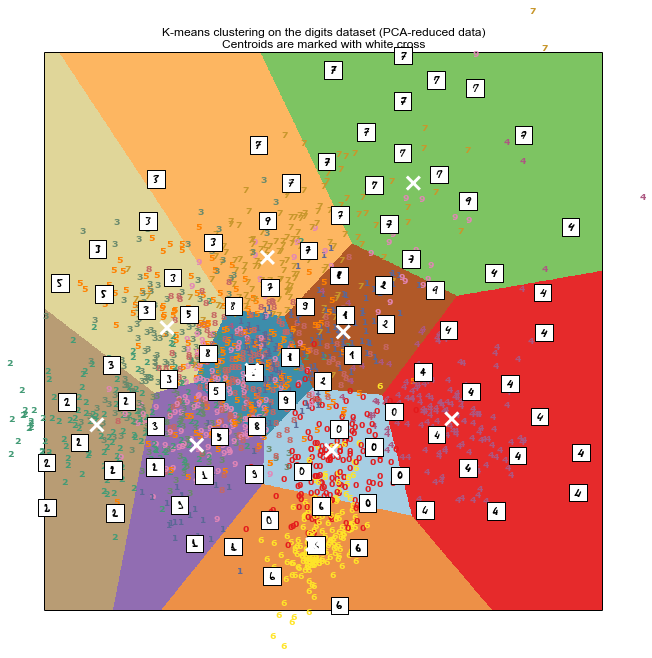

In [31]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired, aspect='auto', origin='lower')

plot_embedding(ax, digits, reduced_data)

centroids = kmeans.cluster_centers_
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='x', s=169, linewidths=3, color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
_ = plt.setp(ax, xlim=(x_min, x_max), ylim=(y_min, y_max), xticks=(), yticks=())